# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

# Reading DataSet

In [3]:
ds= pd.read_csv('tested.csv')

In [4]:
ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Exploratory Data Analysis(EDA)

In [5]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
ds.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [7]:
ds.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
408,1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [8]:
ds.shape

(418, 12)

In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [10]:
ds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Data Type Conversion

In [12]:
ds.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

##### Replacing Null Values with Mean of Age and Fare

In [13]:
ds['Age'] = ds['Age'].fillna(ds['Age'].mean())
ds['Fare'] = ds['Fare'].fillna(ds['Fare'].mean())

##### Verifying that all Null Values are Gone

In [14]:
ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [15]:
ds['Age'] = ds['Age'].astype(int)
ds['Fare'] = ds['Fare'].astype(int)

##### Verifying that Age & Fare  Datatype is changed

In [16]:
ds.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex            object
Age             int32
SibSp           int64
Parch           int64
Ticket         object
Fare            int32
Cabin          object
Embarked       object
dtype: object

## Droping unwanted Features

In [17]:
data = ds.drop(['PassengerId','Name','Cabin','Ticket'], axis =1, inplace=True)

In [18]:
ds.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34,0,0,7,Q
1,1,3,female,47,1,0,7,S
2,0,2,male,62,0,0,9,Q
3,0,3,male,27,0,0,8,S
4,1,3,female,22,1,1,12,S
5,0,3,male,14,0,0,9,S
6,1,3,female,30,0,0,7,Q
7,0,2,male,26,1,1,29,S
8,1,3,female,18,0,0,7,C
9,0,3,male,21,2,0,24,S


#### Using Pandas

In [19]:
data3=ds
data3

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34,0,0,7,Q
1,1,3,female,47,1,0,7,S
2,0,2,male,62,0,0,9,Q
3,0,3,male,27,0,0,8,S
4,1,3,female,22,1,1,12,S
...,...,...,...,...,...,...,...,...
413,0,3,male,30,0,0,8,S
414,1,1,female,39,0,0,108,C
415,0,3,male,38,0,0,7,S
416,0,3,male,30,0,0,8,S


In [20]:
data_encoded=pd.get_dummies(data3)

In [21]:
data_encoded.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,34,0,0,7,0,1,0,1,0
1,1,3,47,1,0,7,1,0,0,0,1
2,0,2,62,0,0,9,0,1,0,1,0
3,0,3,27,0,0,8,0,1,0,0,1
4,1,3,22,1,1,12,1,0,0,0,1
5,0,3,14,0,0,9,0,1,0,0,1
6,1,3,30,0,0,7,1,0,0,1,0
7,0,2,26,1,1,29,0,1,0,0,1
8,1,3,18,0,0,7,1,0,1,0,0
9,0,3,21,2,0,24,0,1,0,0,1


## Data Visualization

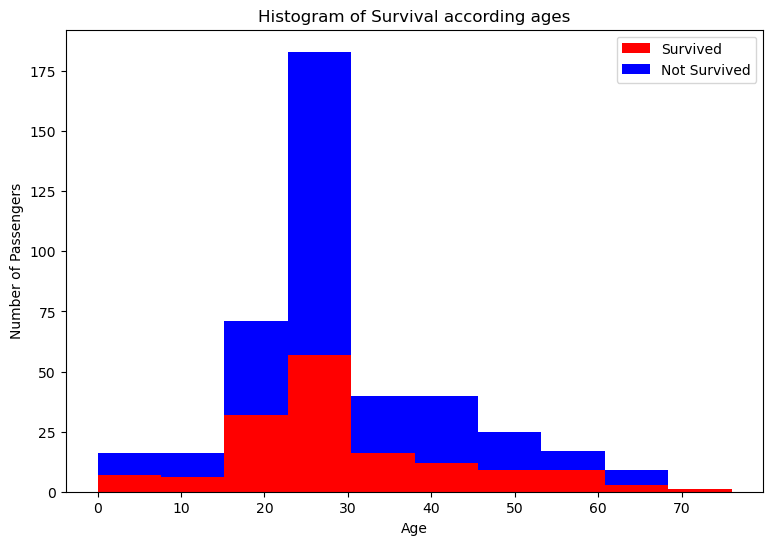

In [22]:
import matplotlib.pyplot as mlt
fig = mlt.figure(figsize =(9, 6))
mlt.hist(x = [ds[ds['Survived']==1]['Age'], ds[ds['Survived']==0]['Age']],stacked=True, color = ['r','b'],label = ['Survived','Not Survived'])
mlt.title('Histogram of Survival according ages')
mlt.xlabel('Age')
mlt.ylabel('Number of Passengers')
mlt.legend()

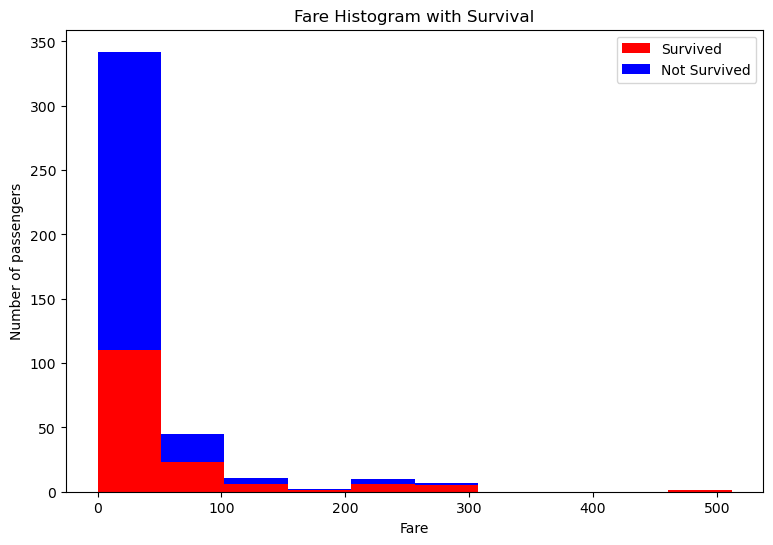

In [23]:
fig = mlt.figure(figsize =(9,6))
mlt.hist(x = [ds[ds['Survived']==1]['Fare'], ds[ds['Survived']==0]['Fare']], stacked=True, color = ['r','b'],label = ['Survived','Not Survived'])
mlt.title('Fare Histogram with Survival')
mlt.xlabel('Fare')
mlt.ylabel('Number of passengers')
mlt.legend()

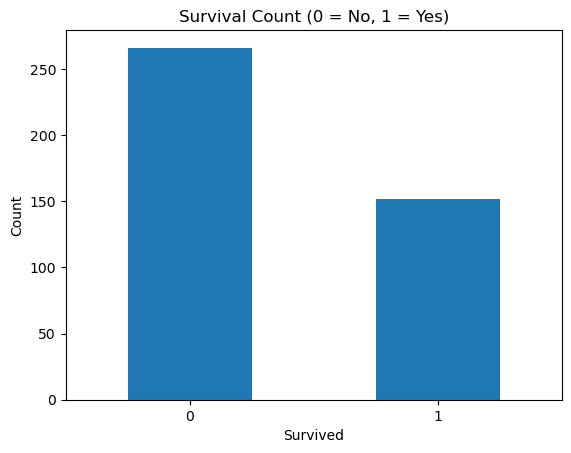

In [24]:
column = 'Survived'

# Create a bar chart
survival_counts = ds[column].value_counts()
survival_counts.plot(kind='bar', rot=0)

# Adding labels and title
mlt.xlabel('Survived')
mlt.ylabel('Count')
mlt.title('Survival Count (0 = No, 1 = Yes)')

# Show the plot
mlt.show()


 # Spliting the data &  Model Building

##### Dividing our data into input and output variables

# SVM Classification

Using sklearn

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [26]:
array = data_encoded.values
X = array[:,1:]
Y = array[:,0]

In [27]:
 data_encoded

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,34,0,0,7,0,1,0,1,0
1,1,3,47,1,0,7,1,0,0,0,1
2,0,2,62,0,0,9,0,1,0,1,0
3,0,3,27,0,0,8,0,1,0,0,1
4,1,3,22,1,1,12,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,0,3,30,0,0,8,0,1,0,0,1
414,1,1,39,0,0,108,1,0,1,0,0
415,0,3,38,0,0,7,0,1,0,0,1
416,0,3,30,0,0,8,0,1,0,0,1


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [29]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((292, 10), (292,), (126, 10), (126,))

### Grid Search CV

In [30]:
clf = SVC()
param_grid = [{'kernel':['linear','rbf'],'gamma':[0.5,0.1,0.01],'C':[10,0.1,0.01] }]
gsv = RandomizedSearchCV(clf,param_grid,cv=6,)
gsv.fit(X_train,y_train)

RandomizedSearchCV(cv=6, estimator=SVC(),
                   param_distributions=[{'C': [10, 0.1, 0.01],
                                         'gamma': [0.5, 0.1, 0.01],
                                         'kernel': ['linear', 'rbf']}])

In [31]:
gsv.best_params_ , gsv.best_score_ 

({'kernel': 'linear', 'gamma': 0.01, 'C': 10}, 1.0)

In [32]:
clf = SVC(kernel='linear',C=10)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_pred, y_test)*100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 100.0


array([[91,  0],
       [ 0, 35]], dtype=int64)

In [33]:
y_pred

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [34]:
confusion_matrix(y_test,y_pred)

array([[91,  0],
       [ 0, 35]], dtype=int64)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00        35

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



## Logistic regression and fit the model

In [36]:
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

### Predict for X dataset

In [37]:
y_pred = classifier.predict(X)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [38]:
y_pred_df= pd.DataFrame({'actual': Y,'predicted': classifier.predict(X)})

In [39]:
y_pred_df

,actual,predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
413,0,0
414,1,1
415,0,0
416,0,0


## Confusion Matrix for the model accuracy

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[266   0]
 [  0 152]]


# Classification report
### Precision – What percent of your predictions were correct?
### Recall – What percent of the positive cases did you catch? 
### F1 score – What percent of positive predictions were correct?

In [41]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418



## Logistic regression accuracy

In [42]:
LR = LogisticRegression(solver='liblinear', max_iter=200)
LR.fit(X,y_pred)
y_pred = LR.predict(X)
LRAcc = accuracy_score(Y,y_pred)
print('Logistic regression accuracy: {:.2f}%'.format(LRAcc*100))

Logistic regression accuracy: 100.00%


# KNN Classification

In [43]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [44]:
model = KNeighborsClassifier(n_neighbors=12)
model.fit(X,Y)

KNeighborsClassifier(n_neighbors=12)

In [45]:
kfold = KFold(n_splits=10)
model = KNeighborsClassifier(n_neighbors=12)
results = cross_val_score(model, X, Y, cv=kfold)

In [46]:
results

array([0.64285714, 0.64285714, 0.64285714, 0.66666667, 0.5952381 ,
       0.57142857, 0.73809524, 0.78571429, 0.63414634, 0.56097561])

### Grid Search for Algorithm Tuning

In [47]:
n_neighbors = np.array(range(3,40))
param_grid = dict(n_neighbors=n_neighbors)
n_neighbors
param_grid

{'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39])}

In [48]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39])})

In [49]:
print(grid.best_score_)
print(grid.best_params_)

0.7154044750430292
{'n_neighbors': 3}


### Visualizing the CV results

In [50]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []

#we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


# k_scores=grid.best_score_
pd.Series(k_scores).sort_values(ascending=False)

0     0.746574
4     0.734437
2     0.717654
3     0.705691
1     0.698548
6     0.696167
5     0.689024
7     0.665041
9     0.662544
8     0.662485
13    0.652904
11    0.650465
22    0.648432
15    0.648200
21    0.645877
16    0.645819
17    0.645703
24    0.643670
23    0.641231
20    0.641115
10    0.641115
19    0.641057
14    0.636179
26    0.631707
25    0.631591
18    0.629152
27    0.626829
12    0.626713
28    0.622067
29    0.612369
dtype: float64

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())

# plot to see clearly
plt.plot(k_range, k_scores)


plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()